#Importing Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Loading And Pre-Processing

In [ ]:
#Reading the data from file using pandas (Read_csv() function)
car_data = pd.read_csv('/content/drive/MyDrive/Dataset/Car Price Dataset/car data.csv')

#Showing Sample of data from dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
 #getting more information about the car dataset (show information about rows and column with their datatypes)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Checking is there any null values in dataset (Shows the table columns with the count of null value present in each column)
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Checking the distribution of Categorical data (Shows the count of each type of categories)

print("Types of Fuel : \n", car_data.Fuel_Type.value_counts())
print("\n")
print("Types of Transmission : \n", car_data.Transmission.value_counts())
print("\n")
print("Types of Seller : \n", car_data.Seller_Type.value_counts())

Types of Fuel : 
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


Types of Transmission : 
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


Types of Seller : 
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


#Transform The Data


In [ ]:
# Transforming the categorical data (Transforming From string to integer)

car_data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

car_data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

car_data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)


In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#Spliting Data into training and testing data

In [ ]:
X = car_data.drop(["Car_Name","Selling_Price"],axis=1)

Y = car_data['Selling_Price']

In [ ]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [ ]:
#Splitting Training and Test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#Linear Regression Model

Model Training

In [ ]:
# Linear Regression Model
lin_reg_model = LinearRegression() #loading the linear regression model 

In [ ]:
#building the Training model on the training data
lin_reg_model.fit(X_train,Y_train) #Find out equation of the model

LinearRegression()

Model Evaluation

In [ ]:
#Prediction on the training data
train_data_pred = lin_reg_model.predict(X_train) #Predict the selling price based on training data and save in train_data_pred variable  

In [ ]:
#Compare the predicted and actual value with R-Squared error metrics (Used in Regression Problem)
error_score = metrics.r2_score(Y_train, train_data_pred) #Compares both the value

print("R-Squared Error : ", error_score) 

R-Squared Error :  0.8838169193709796


Visualization of Actual prices and Predicted prices

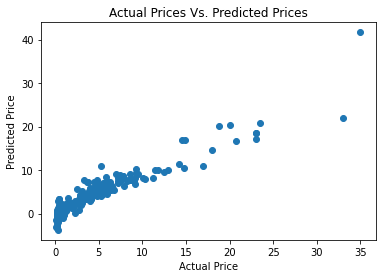

In [ ]:
#Plot the scatter plot graph to show the correlation between actual and predicted value
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()

Testing the Model 

In [ ]:
#Prediction on the testing data
test_data_pred = lin_reg_model.predict(X_test)

In [ ]:
#Find out R-Squared error metrics (Used in Regression Problem)
error_score = metrics.r2_score(Y_test, test_data_pred) #Compares both the value

print("R-Squared Error : ", error_score) 

R-Squared Error :  0.8401532365377697


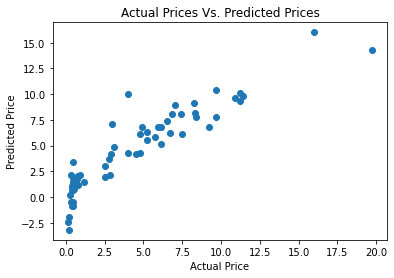

In [ ]:
#Plot the scatter plot graph to show the correlation between actual and predicted value
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()

#LASSO Regression Model

In [ ]:
#Importing the Lassos Regression Model
from sklearn.linear_model import Lasso

Model Training

In [ ]:
# Linear Regression Model
las_reg_model = Lasso() #loading the lasso regression model 

In [ ]:
#building the Training model on the training data
las_reg_model.fit(X_train,Y_train) #Find out equation of the model

Lasso()

Model Evaluation

In [ ]:
#Prediction on the training data
train_data_pred = las_reg_model.predict(X_train)   

In [ ]:
#Compare the predicted and actual value with R-Squared error metrics (Used in Regression Problem)
error_score = metrics.r2_score(Y_train, train_data_pred) #Compares both the value

print("R-Squared Error : ", error_score) 

R-Squared Error :  0.843587395258283


Visualization of Actual prices and Predicted prices

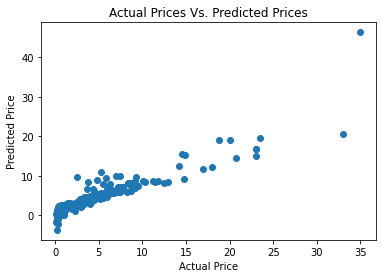

In [ ]:
#Plot the scatter plot graph to show the correlation between actual and predicted value
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()

Testing the Model 

In [ ]:
#Prediction on the testing data
test_data_pred = las_reg_model.predict(X_test)

In [ ]:
#Find out R-Squared error metrics (Used in Regression Problem)
error_score = metrics.r2_score(Y_test, test_data_pred) #Compares both the value

print("R-Squared Error : ", error_score) 

R-Squared Error :  0.8497457570738539


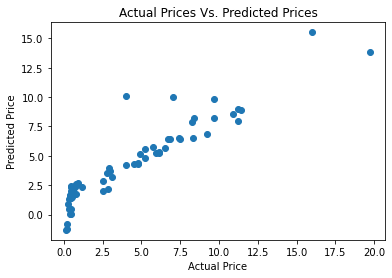

In [ ]:
#Plot the scatter plot graph to show the correlation between actual and predicted value
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs. Predicted Prices")
plt.show()